C:\Users\abhij\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/15
750/750 [==============================] - 75s 89ms/step - loss: 0.5803 - accuracy: 0.7862 - val_loss: 0.4006 - val_accuracy: 0.8540
Epoch 2/15
750/750 [==============================] - 55s 73ms/step - loss: 0.3623 - accuracy: 0.8682 - val_loss: 0.3369 - val_accuracy: 0.8788
Epoch 3/15
750/750 [==============================] - 30s 40ms/step - loss: 0.3119 - accuracy: 0.8868 - val_loss: 0.3188 - val_accuracy: 0.8824
Epoch 4/15
750/750 [==============================] - 32s 42ms/step - loss: 0.2808 - accuracy: 0.8969 - val_loss: 0.3004 - val_accuracy: 0.8912
Epoch 5/15
750/750 [==============================] - 38s 51ms/step - loss: 0.2576 - accuracy: 0.9055 - val_loss: 0.2806 - val_accuracy: 0.8954
Epoch 6/15
750/750 [==============================] - 44s 59ms/step - loss: 0.2380 - accuracy: 0.9128 - val_loss: 0.2770 - val_accuracy: 0.9002
Epoch 7/15
750/750 [==============================] - 26s 35ms/step - loss: 0.2181 - accuracy: 0.9197 - val_loss: 0.2672 - val_accuracy:

C:\Users\abhij\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 512ms/step


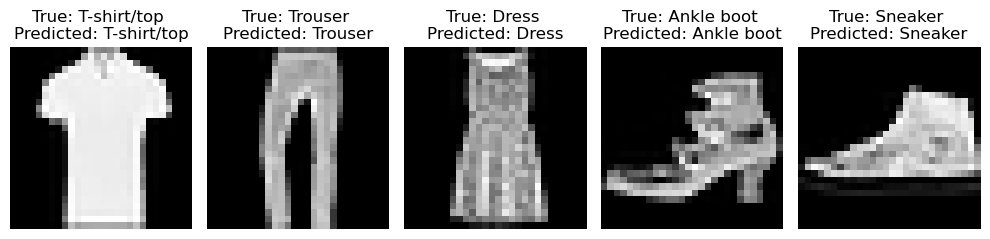

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model_name = "fashion_classifier"
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Measure training time
start_time = time.time()

# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Save the trained model
model.save(f"{model_name}.h5")

# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()





import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
import time

# Load the trained model
model = load_model('fashion_classifier.h5')

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load and preprocess your random images
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28 pixels
    image = np.array(image)  # Convert to numpy array
    image = image.reshape((1, 28, 28, 1)).astype('float32') / 255  # Reshape and normalize
    return image

# Example usage:
image_path = 'C:\\Users\\abhij\\Downloads\\bag.jpeg'
sample_image = preprocess_image(image_path)

# Make predictions
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

# Measure prediction time
start_time = time.time()
prediction = model.predict(sample_image)
end_time = time.time()

predicted_label = np.argmax(prediction)

# Display the predicted label and prediction time
print(f"Predicted: {class_labels[predicted_label]}")
print(f"Prediction time: {end_time - start_time:.4f} seconds")

# Show the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_labels[predicted_label]}")
plt.axis('off')
plt.show()
